In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

### Exercise 1
A Soft Murmur'' is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

“柔和的雜音”是一個播放自然噪聲源（包括雨，浪，風等）的網站。在http://asoftmurmur.com/about/上，您可以找到其錄音列表，其中大多數是 在http://freesound.org。

下載其中一些文件併計算每個信號的頻譜。 功率譜看起來像白噪聲，粉紅噪聲還是布朗噪聲？ 頻譜如何隨時間變化？

In [1]:
import IPython.display as dp

url1= 'https://freesound.org/people/Soarer/sounds/13793/download/13793__soarer__north-sea.wav'
#url2= 'https://freesound.org/people/OroborosNZ/sounds/141251/download/141251__oroborosnz__thunder-storm.aiff'
url2= 'https://freesound.org/people/soundman9826/sounds/193335/download/193335__soundman9826__rain-and-thunder.mp3'
url3= 'https://freesound.org/people/inchadney/sounds/56611/download/56611__inchadney__morning-in-the-country.wav'
url4= 'https://freesound.org/people/martypinso/sounds/22604/download/22604__martypinso__dmp010037-crickets-texas.wav'

dp.Audio(url= url1)



I chose a recording of ocean waves.  I selected a short segment:

我選擇了海浪的錄音。 我選擇了一小段：

In [ ]:
segment = wave.segment(start= 10, duration=1.0)
segment.make_audio()

(10.0, 11)

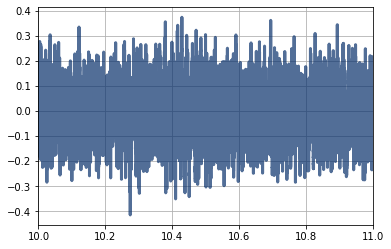

In [13]:
segment.plot()
import matplotlib.pyplot as pl
pl.xlim([10.0,11])

And here's its spectrum:

這是它的頻譜：

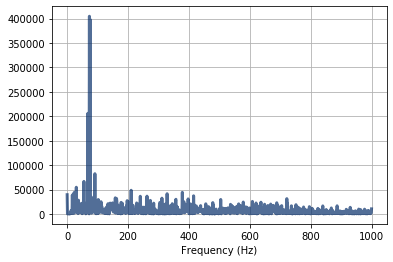

In [16]:
spectrum = segment.make_spectrum()
spectrum.plot_power(high=1000)
thinkplot.config(xlabel='Frequency (Hz)')

Amplitude drops off with frequency, so this might be red or pink noise.  We can check by looking at the power spectrum on a log-log scale.

幅度隨頻率下降，因此可能是紅色或粉紅色噪聲。 我們可以通過以對數-對數刻度查看功率譜來進行檢查。

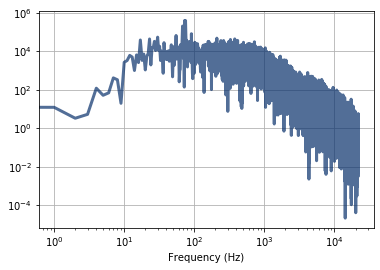

In [6]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

This structure, with increasing and then decreasing amplitude, seems to be common in natural noise sources.

Above $f = 10^3$, it might be dropping off linearly, but we can't really tell.

To see how the spectrum changes over time, I'll select another segment:

這種結構，振幅先增大後減小，在自然噪聲源中似乎很常見。

高於 $f = 10^3$，它可能會線性下降，但我們無法確定。

要查看頻譜隨時間的變化，我將選擇另一個段：

In [17]:
segment2 = wave.segment(start=20, duration=1.0)
segment2.make_audio()

And plot the two spectrums:

並繪製兩個頻譜：

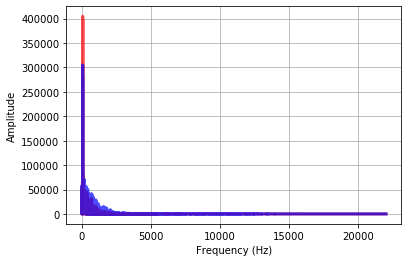

In [8]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

Here they are again, plotting power on a log-log scale.

它們再次出現，以對數-對數刻度繪製功率。

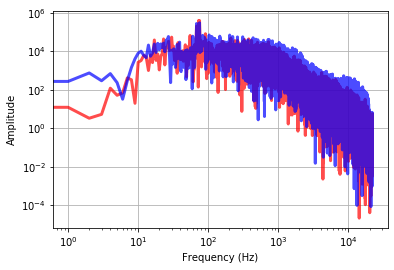

In [9]:
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

So the structure seems to be consistent over time.

We can also look at a spectrogram:

因此，結構似乎隨著時間的推移是一致的。

我們還可以看一個頻譜圖：

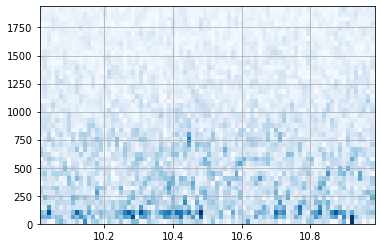

In [48]:
segment.make_spectrogram(1024).plot(high=2000)

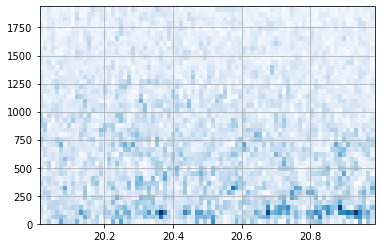

In [11]:
segment2.make_spectrogram(1024).plot(high=2000)

Within this segment, the overall amplitude drops off, but the mixture of frequencies seems consistent.

在此段內，總振幅下降，但是頻率的混合似乎是一致的。